# BTC autotrader history analysis

In [109]:
import datetime
import json
import boto3
import io
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('ggplot')

In [48]:
csv_file = '../btc-autotrader/lib/data/log/2019-03-05T07:33:21.932647.csv'

In [87]:
df = pd.read_csv(csv_file, names=('datetime', 'cash', 'btc_in_possession', 'btc_current_price', 'position', 'rate_of_change'))

In [88]:
df.datetime = pd.to_datetime(df.datetime)

In [89]:
conditions = [
    (df.position == 'None'),
    (df.position == 'POSSESSING'),
    (df.position == 'BIDDED'),
    (df.position == 'ASKED')
]
choices = [0, 3, 2, 1]
df['position_int'] = np.select(conditions, choices, default=0)

In [90]:
df.tail()

,datetime,cash,btc_in_possession,btc_current_price,position,rate_of_change,position_int
535,2019-03-05 08:21:30.201741,79000.0,0.038686,412859.0,None,-0.058608,0
536,2019-03-05 08:21:35.377389,83128.0,0.028671,412859.0,None,-0.074547,0
537,2019-03-05 08:21:40.566362,83128.0,0.038686,412859.0,None,-0.140724,0
538,2019-03-05 08:21:46.489600,83128.0,0.038686,412742.0,None,-0.187339,0
539,2019-03-05 08:21:51.682173,83128.0,0.038686,412741.0,None,-0.373089,0


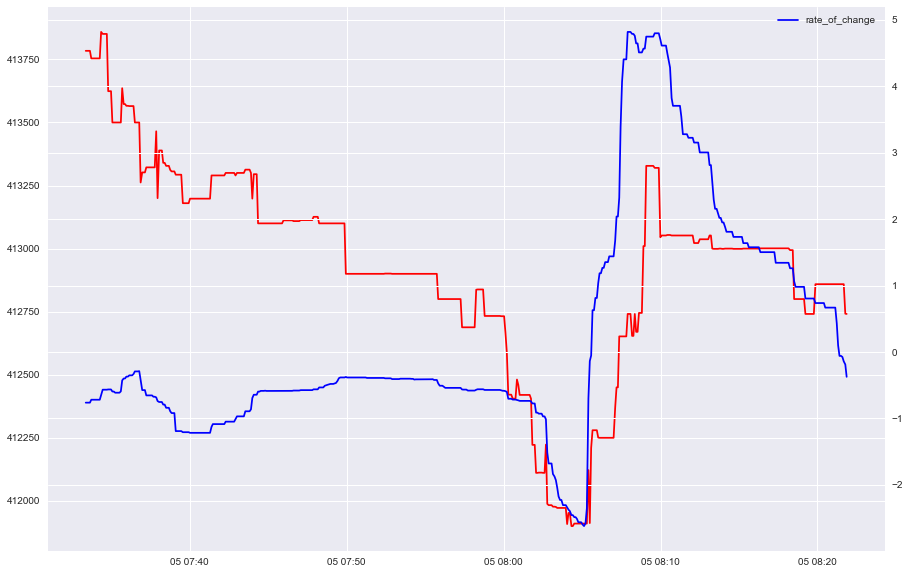

In [91]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
#plt.plot(df.datetime, df.cash)
ax1.plot(df.datetime, df.btc_current_price, color='r')
ax2.plot(df.datetime, df.rate_of_change, color='b')
plt.legend()
plt.show()

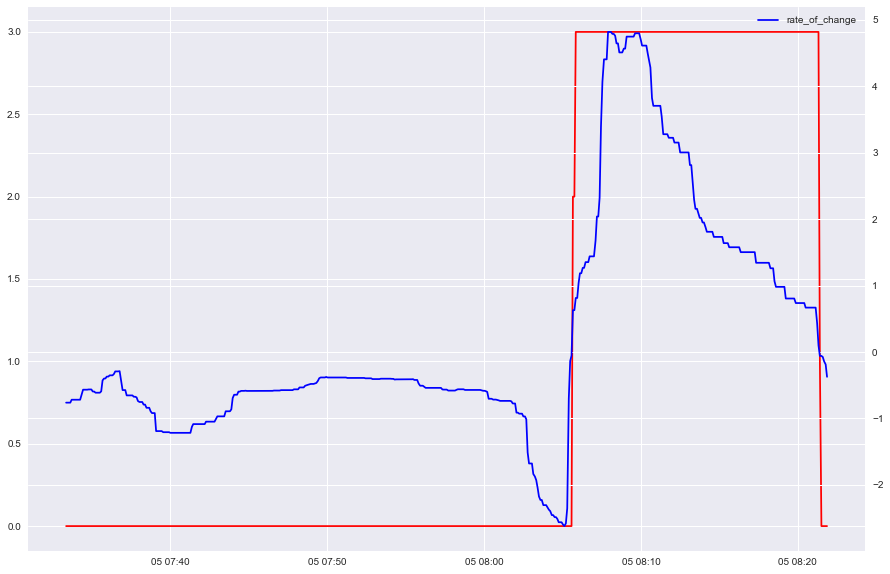

In [92]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
#plt.plot(df.datetime, df.cash)
ax1.plot(df.datetime, df.position_int, color='r')
ax2.plot(df.datetime, df.rate_of_change, color='b')
plt.legend()
plt.show()

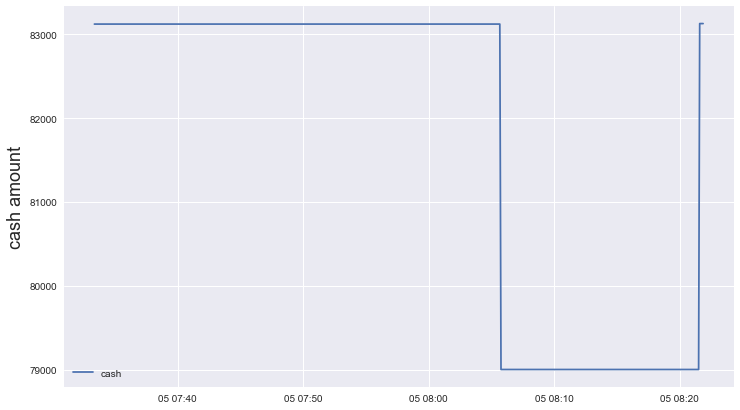

In [99]:
plt.figure(figsize=(12, 7))
plt.plot(df.datetime, df.cash)
#plt.ylim(83000,83500)
plt.ylabel('cash amount', fontsize=18)
plt.legend()
plt.show()

## calculate and plot acceleration

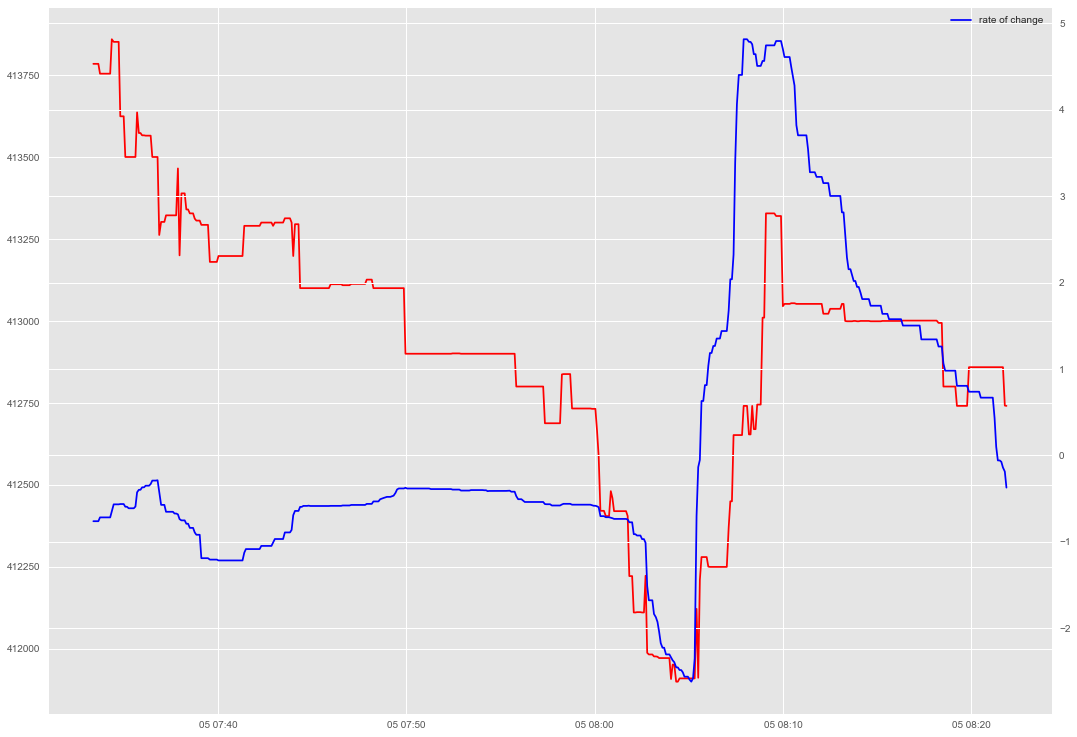

In [112]:
fig, ax1 = plt.subplots(figsize=(18,13))
ax2 = ax1.twinx()
#plt.plot(df.datetime, df.cash)
ax1.plot(df.datetime, df.btc_current_price, color='r', label='current price')
ax2.plot(df.datetime, df.rate_of_change, color='b', label='rate of change')
plt.legend()
plt.show()